In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from nltk import word_tokenize
from paragraph_analysis import ParagraphAnalysis

In [3]:
data_csv = "../data/clean_csvs/main.csv"
dataframe = pd.read_csv(data_csv)
# dataframe = dataframe.drop(["words", "word_count"], axis=1)
data_dict = dataframe.to_dict(orient="list")
print(data_dict.keys())

dict_keys(['id', 'paragraphs', 'words', 'word_count'])


In [4]:
vocab = pd.read_csv("../data/word2vec/logs/exp-03-main-clean-data-w10-nng5-ed300/metadata.tsv", sep='/t', names=['words'])
vocab = list(vocab["words"])
vocab.insert(0, "<pad>")
print(len(vocab))

word2vec_dir = "../data/word2vec/logs/exp-03-main-clean-data-w10-nng5-ed300/tf-saved-model"
word2vec = tf.keras.models.load_model(word2vec_dir)
target_embedding = word2vec.get_layer("w2v_target_embedding")
feature_vectors = word2vec.get_layer("w2v_target_embedding").get_weights()[0]
print(feature_vectors.shape)

13693


<ipython-input-4-6f05b4d7c19e>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  vocab = pd.read_csv("../data/word2vec/logs/exp-03-main-clean-data-w10-nng5-ed300/metadata.tsv", sep='/t', names=['words'])


(13693, 300)


## Dimensionality Reduction

In [5]:
# Defining the number of principal components to generate
n = feature_vectors.shape[1]

# Finding principal components for the data
pca1 = PCA(n_components = n, random_state = 1)
feature_vectors_pca = pd.DataFrame(pca1.fit_transform(feature_vectors))

# The percentage of variance explained by each principal component
exp_var1 = pca1.explained_variance_ratio_

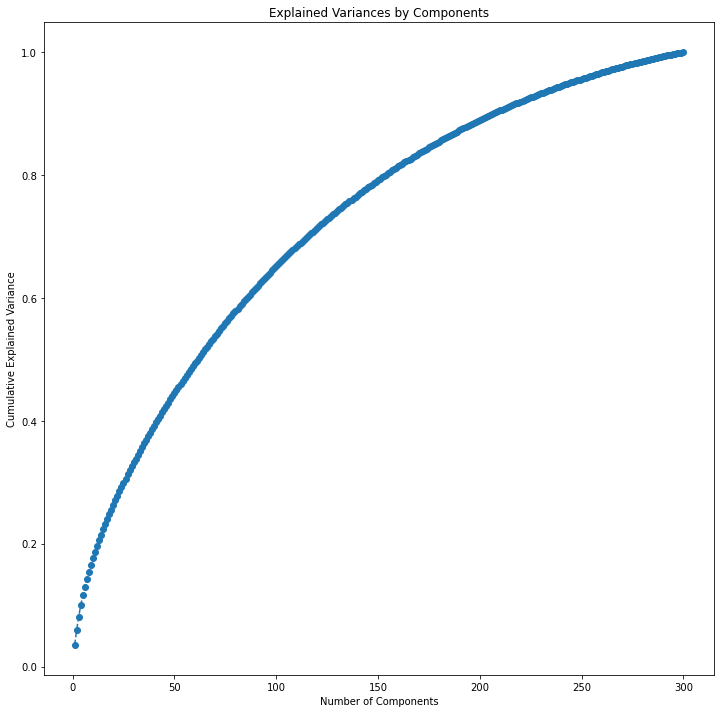

In [6]:
plt.figure(figsize = (12, 12))
plt.plot(range(1, n+1), pca1.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [7]:
# Finding principal components for the data
pca = PCA(n_components = 150, random_state = 1)
feature_vectors_pca = pd.DataFrame(pca.fit_transform(feature_vectors))
feature_vectors_pca

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,-0.080633,-0.339742,0.060962,-0.162349,-0.000181,0.348971,-0.138869,-0.247111,0.113249,-0.074337,...,0.033016,-0.020256,0.031673,0.020877,0.044564,0.044310,-0.037089,0.021026,0.046426,0.012434
1,-0.111074,-0.291059,0.043339,-0.205847,0.015798,0.281047,-0.146036,-0.252617,0.213548,-0.033838,...,0.039204,-0.009636,-0.042728,0.054264,-0.003717,0.021227,-0.016509,0.052094,0.037118,-0.015507
2,-0.685187,-0.453449,0.495171,-0.017387,0.464810,-0.293528,-0.114291,-0.546689,-0.388432,0.447147,...,-0.459426,-0.183893,-0.189219,0.132707,0.067898,-0.045552,-0.697255,-0.280219,0.383632,-0.144556
3,-1.175460,-0.896849,-0.590734,-0.294970,-0.344146,-0.076465,-0.070229,-0.465488,0.103392,0.412492,...,-0.039685,-0.082721,0.280295,0.458599,0.239444,-0.262163,-0.132226,0.393329,-0.062030,-0.148358
4,-0.972573,-1.003318,-0.684765,0.178053,-0.337538,0.522946,0.639837,-0.305950,0.375194,0.688142,...,-0.333164,-0.588114,-0.113584,-0.197292,0.084713,-0.194422,0.084187,-0.245825,0.123607,0.156569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13688,0.420269,-1.337648,-0.170112,-0.216774,0.224109,0.347056,-0.305748,-0.163965,0.392458,0.278397,...,0.051312,0.036164,0.018829,-0.084178,-0.094045,0.038009,-0.011240,-0.073801,-0.028825,0.050860
13689,0.236992,-0.125997,0.628215,-0.219083,0.210182,-0.060514,0.809354,0.278722,0.318272,0.753686,...,0.058803,0.151988,0.284365,-0.225452,0.041863,-0.250424,0.123224,-0.016292,0.273585,-0.022330
13690,0.176220,-0.188592,-0.183690,-0.254645,-0.105891,0.592737,-0.230378,-0.404906,0.210594,-0.196128,...,-0.186827,-0.004754,0.028994,-0.059245,-0.084834,-0.192964,-0.125118,-0.221617,-0.012414,0.099249
13691,1.034549,0.227421,-0.121284,-0.431454,-0.009288,0.164519,-0.871513,-0.624442,0.335627,-0.343586,...,-0.026379,-0.078034,0.011640,0.205797,-0.019713,-0.025654,-0.275533,-0.278992,-0.170011,-0.091595


## k-Means Clustering on Feature Space

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/clust

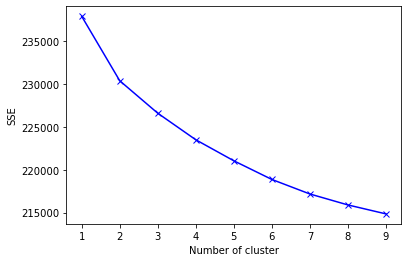

In [8]:
# Empty dictionary to store the SSE for each value of K
sse = {} 

# Iterate for a range of Ks and fit the scaled data to the algorithm. 
# Use inertia attribute from the clustering object and store the inertia value for that K 
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(feature_vectors_pca)
    sse[k] = kmeans.inertia_

# Elbow plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/clust

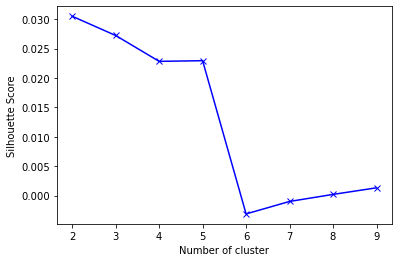

In [9]:
from sklearn.metrics import silhouette_score
# Empty dictionary to store the Silhouette score for each value of K
sc = {} 
# Iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that K 
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(feature_vectors_pca)
    labels = kmeans.predict(feature_vectors_pca)
    sc[k] = silhouette_score(feature_vectors_pca, labels)

# Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

In [10]:
kmeans = KMeans(n_clusters = 5, random_state = 1)
kmeans.fit(feature_vectors_pca)

x = kmeans.predict(feature_vectors_pca)
print(x.shape)

# Adding predicted labels to the original data and the scaled data 
df = pd.DataFrame(kmeans.predict(feature_vectors_pca), index=vocab, columns=["clusterID"])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(13693,)


In [11]:
df

,clusterID
<pad>,4
[UNK],4
’,0
“,4
”,4
...,...
103–129,2
103–,0
0b6num8iske91jpg,4
08,3


In [12]:
grouped = df.groupby("clusterID")
topics = []
for clusterID, group in grouped:
    topics.append(list(group.index))

In [13]:
for top in topics:
    print(top)


['’', 'King', 'Ser', 'king', 'men', 'Landing', 'Velaryon', 'Lady', 'even', 'three', 'knight', 'Red', 'Hand', 'still', 'new', 'whilst', 'hand', 'half', 'court', 'died', 'put', 'Though', 'ship', 'sword', 'known', 'Westeros', 'place', 'gold', 'Sea', 'Seven', 'war', 'hundred', 'began', 'Kingsguard', 'across', 'age', 'part', 'turned', 'royal', 'remained', 'Oldtown', 'next', 'thousand', 'High', 'Baratheon', 'good', 'White', 'II', 'Even', 'amongst', 'Stark', 'Peake', 'Harrenhal', 'command', 'six', 'fleet', 'Snake', 'proved', 'Lannister', 'turn', 'Storm', 'house', 'Kingdoms', 'lost', 'held', 'Vale', 'Lys', 'land', 'End', 'seat', 'island', 'With', 'reached', 'master', 'keep', 'Great', 'whose', 'friend', 'Larys', 'lordship', 'Tyland', 'Joffrey', 'white', 'rest', 'beyond', 'Only', 'regent', 'others', 'host', 'smallfolk', 'fight', 'Lyonel', 'south', 'raven', 'commanded', 'wine', 'Manderly', 'Borros', 'making', 'cousin', 'Winterfell', 'peace', 'coin', 'strength', 'Watch', 'Braavos', 'Unwin', 'Rowan

In [14]:
# Topic model
from bertopic import BERTopic

In [27]:
topic_model = BERTopic(n_gram_range=(3, 3))
topics, probabilities = topic_model.fit_transform(data_dict["paragraphs"])

In [38]:
x = topic_model.get_topic_info()
x.to_csv("topics.csv")

In [33]:
topic_model.get_topic(0)

[('grand maester mellos', 0.002843683991866334),
 ('commander city watch', 0.0020383478212939775),
 ('iron throne corlys', 0.0019871987763958334),
 ('behind scene video', 0.001984363287605265),
 ('rhaenyra three son', 0.0017773957291424235),
 ('married rhea royce', 0.0015557596648298451),
 ('daemon return wife', 0.0015557596648298451),
 ('real father rhaenyra', 0.0015557596648298451),
 ('claim still virgin', 0.0015557596648298451),
 ('valyrian steel necklace', 0.0015557596648298451)]

In [36]:
topic_model.visualize_barchart(topics=[4, 5, 6, 7], top_n_topics=12, width=512, height=512)

In [60]:
topic_model.visualize_topics(topics=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], width=1080, height=1080)

In [32]:
hierarchical_topics = topic_model.hierarchical_topics(data_dict["paragraphs"])
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

100%|██████████| 51/51 [00:00<00:00, 85.29it/s]


In [44]:
# Get the topic predictions
topic_prediction = topic_model.topics_[:]
# Save the predictions in the dataframe
dataframe['topic_prediction'] = topic_prediction
# Take a look at the data
dataframe.head(10)

,id,paragraphs,words,word_count,topic_prediction
0,101,The scroll Jaehaerys open giving final result ...,"['The', 'scroll', 'Jaehaerys', 'open', 'giving...",31,-1
1,102,The phrasing son may caused confusion whether ...,"['The', 'phrasing', 'son', 'may', 'caused', 'c...",40,-1
2,103,The detail Great Council Harrenhal somewhat co...,"['The', 'detail', 'Great', 'Council', 'Harrenh...",61,-1
3,104,Jaehaerys physically present Harrenhal long de...,"['Jaehaerys', 'physically', 'present', 'Harren...",18,36
4,106,The entire brief council scene filmed entirely...,"['The', 'entire', 'brief', 'council', 'scene',...",68,3
5,107,The Small Council,"['The', 'Small', 'Council']",3,-1
6,108,Viserys Small Council episode consists Otto Hi...,"['Viserys', 'Small', 'Council', 'episode', 'co...",51,-1
7,109,The Small Council somewhat condensed book Corl...,"['The', 'Small', 'Council', 'somewhat', 'conde...",59,-1
8,110,Corlys Velaryon introduces recent alliance Fre...,"['Corlys', 'Velaryon', 'introduces', 'recent',...",32,28
9,111,Grand Maester Mellos TV series condensation tw...,"['Grand', 'Maester', 'Mellos', 'TV', 'series',...",44,-1


In [53]:
from collections import defaultdict
grouped = dataframe.groupby("topic_prediction")
topics = defaultdict(list)
for topicID, group in grouped:
    for sentence in group["paragraphs"]:
        topics[topicID].extend(sentence.split(" "))

In [58]:
with open('your_file.txt', 'w') as f:
    for line in topics[0]:
        f.write("%s\n" % line)